In [1]:
import sys
sys.path.append('./')


from Analyzation_relative import Data_process as DP
from Analyzation_relative import Descriptive_statistics as DS
from Analyzation_relative import Regression as Reg
from Analyzation_relative.Statistical_inference import Normality_test

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


#*----------------------------------------------------------------
mpl.rcParams['font.sans-serif'] = ['SimHei'] # *允许显示中文
plt.rcParams['axes.unicode_minus']=False# *允许显示坐标轴负数
#*----------------------------------------------------------------

params = {'legend.fontsize': 7,}

plt.rcParams.update(params)

df = pd.read_excel("data/merge_shop_coupon_nm.xls" , index_col = 0)
columns = ['关键词', '城市', '评分', '评价数', '人均' , '团购价', '购买人数']
data = df[columns]
print(DS.DataLabeling(data))
data.head(3)

[1, 1, 2, 0, 0, 0, 0]


,关键词,城市,评分,评价数,人均,团购价,购买人数
0,火锅,xa,4.4,877,45.5,118.5,1692
1,火锅,xa,4.6,2253,100.0,88.0,19584
2,火锅,xa,4.5,1398,56.0,52.0,11798


In [2]:
mode , Xlist = Reg.Automatic_reg(df[['评价数', '人均' , '团购价', '购买人数']] , dataclass = None , mode = ['dummy and linear'])
mode

d:\Github_relate\local_storage\Graduation-Project-Of-Undergraduate\Analyzation_relative\Regression.py:683: UserWarning: There is no binary variable in X , ignored this mode : dummy and linear
  warnings.warn(f'There is no binary variable in X , ignored this mode : {mode_type}')


[]

In [3]:
Xlist

[]

In [3]:
# data_constructor 部分完成
Reg.data_constructor(df[['评分' , '关键词', '城市' , '人均' , '团购价']] , dataclass = [2 , 1 ,1 ,0 , 0] , target_type = 'polynomial')

,人均,团购价,关键词,城市,评分,人均^2,团购价^2
0,45.5,118.5,0,0,13,2070.25,14042.25
1,100.0,88.0,0,0,15,10000.00,7744.00
2,56.0,52.0,0,0,14,3136.00,2704.00
3,63.0,59.9,0,0,13,3969.00,3588.01
4,84.0,59.5,0,0,12,7056.00,3540.25
...,...,...,...,...,...,...,...
192,19.5,31.9,1,1,17,380.25,1017.61
193,100.0,46.0,1,1,13,10000.00,2116.00
194,50.0,100.0,1,1,3,2500.00,10000.00
195,540.0,46.4,1,1,11,291600.00,2152.96


In [1]:
# DS.Auto_plt(data[['关键词', '城市', '评分' , '评价数', '人均' , '团购价', '购买人数']] , dataclass=[1, 1, 0, 0, 0, 0, 0])

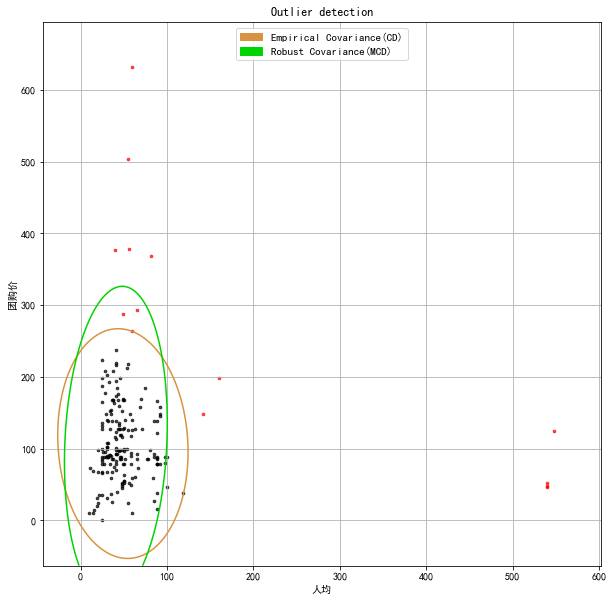

In [10]:
num_outindex , binary_outindex , df_pro = DP.Outlier_TreatAndPlot(data[['人均' , '团购价']] ,dataclass = [0 , 0] , binary_treat= 'frequency' , multi_num_method='CD' , plot = True , contamination=0.07)

In [12]:
df_pro

,人均,团购价
0,45.5,118.5
1,100.0,88.0
2,56.0,52.0
3,63.0,59.9
4,84.0,59.5
...,...,...
190,85.0,26.6
191,30.0,68.0
192,19.5,31.9
193,100.0,46.0
